# To predict diabetes using diabetes data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as mplt
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Read dataset

In [4]:
diabetes_data= pd.read_csv("/content/drive/MyDrive/DMML_Project/diabetes-dataset.csv00")

In [5]:
diabetes_data.shape

(2000, 9)

In [6]:
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
# check if any null value is present
diabetes_data.isnull().values.any()

False

In [8]:
diabetes_data.isnull().values.any() #check the null value in dataset

False

In [9]:
diabetes_data.corr() #Correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


In [10]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [11]:
diabetes_data.groupby('Outcome').size()

Outcome
0    1316
1     684
dtype: int64

In [12]:
diabetes_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [13]:
diabetes_true_count = len(diabetes_data.loc[diabetes_data['Outcome'] == True])
diabetes_false_count = len(diabetes_data.loc[diabetes_data['Outcome'] == False])

In [14]:
(diabetes_true_count,diabetes_false_count)

(684, 1316)

# Train the model using dataset

In [15]:
# Train-Test Split

from sklearn.model_selection import train_test_split
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class = ['Outcome']

In [16]:
X = diabetes_data[feature_columns].values
y = diabetes_data[predicted_class].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

## Check how many other missing(zero) values

In [17]:
print("Total number of rows : {0}".format(len(diabetes_data)))
print("Number of rows missing Pregnancies: {0}".format(len(diabetes_data.loc[diabetes_data['Pregnancies'] == 0])))
print("Number of rows missing Glucose: {0}".format(len(diabetes_data.loc[diabetes_data['Glucose'] == 0])))
print("Number of rows missing BloodPressure: {0}".format(len(diabetes_data.loc[diabetes_data['BloodPressure'] == 0])))
print("Number of rows missing SkinThickness: {0}".format(len(diabetes_data.loc[diabetes_data['SkinThickness'] == 0])))
print("Number of rows missing Insulin: {0}".format(len(diabetes_data.loc[diabetes_data['Insulin'] == 0])))
print("Number of rows missing BMI: {0}".format(len(diabetes_data.loc[diabetes_data['BMI'] == 0])))
print("Number of rows missing DiabetesPedigreeFunction: {0}".format(len(diabetes_data.loc[diabetes_data['DiabetesPedigreeFunction'] == 0])))
print("Number of rows missing Age: {0}".format(len(diabetes_data.loc[diabetes_data['Age'] == 0])))

Total number of rows : 2000
Number of rows missing Pregnancies: 301
Number of rows missing Glucose: 13
Number of rows missing BloodPressure: 90
Number of rows missing SkinThickness: 573
Number of rows missing Insulin: 956
Number of rows missing BMI: 28
Number of rows missing DiabetesPedigreeFunction: 0
Number of rows missing Age: 0


In [18]:
from sklearn.impute import SimpleImputer
fill_values =SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [19]:
diabetes_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


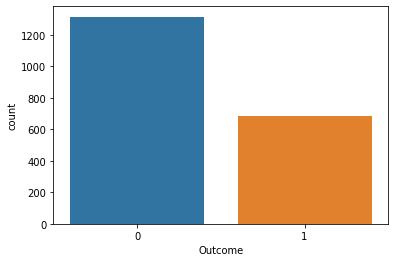

In [20]:
sns.countplot(diabetes_data['Outcome'])

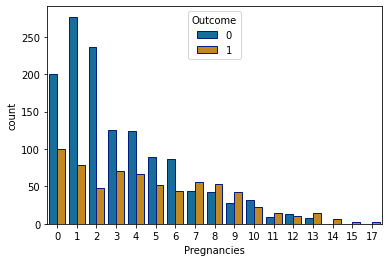

In [21]:
sns.countplot(x='Pregnancies',hue='Outcome',data=diabetes_data,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))

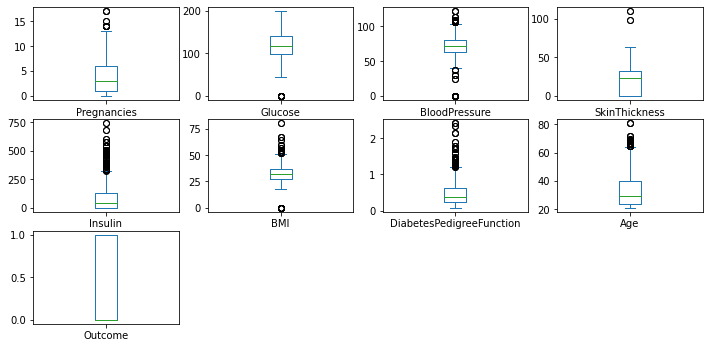

In [22]:
diabetes_data.plot(kind='box', subplots=True, figsize=(12,12), layout=(6,4))
mplt.show()

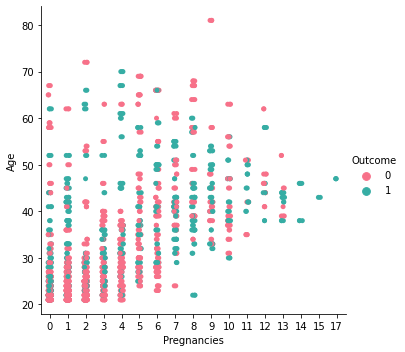

In [23]:
sns.catplot(data=diabetes_data, x='Pregnancies', y='Age', hue='Outcome', palette='husl')

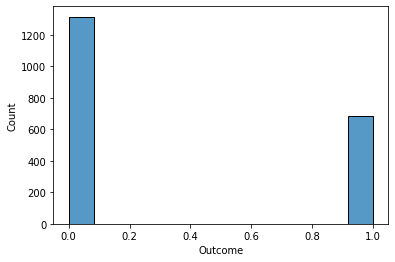

In [24]:
sns.histplot(data=diabetes_data, x="Outcome")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f61fab15a90>,
      dtype=object)

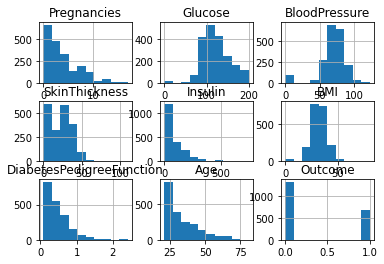

In [25]:
diabetes_data.hist()

# Applying Algorithms

# KNeighborsClassifier

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train.ravel())
knnpredict=knn.predict(X_test)

In [27]:
knn.score(X_test,y_test)

0.7933333333333333

# GaussianProcessClassifier

In [28]:
from sklearn.gaussian_process import GaussianProcessClassifier
gpc=GaussianProcessClassifier()
gpc.fit(X_train,y_train.ravel())
gpcpredict=gpc.predict(X_test)

In [29]:
gpc.score(X_test,y_test)

0.95

# GaussianNaiveBayesClassifier

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train.ravel())
gnbpredict=gnb.predict(X_test)

In [31]:
gnb.score(X_test,y_test)

0.755

# SVC (support-vector-machine-algorithm)

In [32]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train.ravel())
svcpredict=svc.predict(X_test)

In [33]:
svc.score(X_test,y_test)

0.7916666666666666

# RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier()

random_forest_model.fit(X_train, y_train.ravel()) 
#used to change a 2-dimensional array or a multi-dimensional array into a contiguous flattened array

RandomForestClassifier()

In [35]:
predict_train_data = random_forest_model.predict(X_test)

random_forest_model.score(X_test,y_test)

0.9683333333333334

# DecisionTreeClassifier

In [36]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc = dtc.fit(X_train,y_train)

#Predict the response for test dataset
predictt = dtc.predict(X_test)

In [37]:
# Model Accuracy
dtc.score(X_test,y_test)

0.94

In [38]:
# predict user data

Pregnancies=int(input("Enter Number of Pregnancies: "))
Glucose=int(input("Enter Glucose: "))
BloodPressure=int(input("Enter Blood Pressure: "))
SkinThickness=int(input("Enter Skin Thickness: "))
Insulin=int(input("Enter Insulin: "))
BMI=float(input("Enter BMI: "))
DiabetesPedigreeFunction=float(input("Enter Diabetes Pedigree Function: "))
Age=int(input("Enter Age: "))

model= RandomForestClassifier()
model.fit(X,y.ravel())

predictions= model.predict([[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]])
if predictions==0:
    print("---------------------------")
    print("---------------------------")
    print('The person is not diabetic')
    print("---------------------------")
    print("---------------------------")
else:
    print("------------------------")
    print("------------------------")
    print('The person is diabetic')
    print("------------------------")
    print("------------------------")

Enter Number of Pregnancies: 0
Enter Glucose: 0
Enter Blood Pressure: 0
Enter Skin Thickness: 0
Enter Insulin: 0
Enter BMI: 0
Enter Diabetes Pedigree Function: 0
Enter Age: 0
---------------------------
---------------------------
The person is not diabetic
---------------------------
---------------------------


#Confusion Matrix


In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,knnpredict))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       398
           1       0.70      0.68      0.69       202

    accuracy                           0.79       600
   macro avg       0.77      0.76      0.77       600
weighted avg       0.79      0.79      0.79       600



In [40]:
print(classification_report(y_test,gpcpredict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       398
           1       0.95      0.90      0.92       202

    accuracy                           0.95       600
   macro avg       0.95      0.94      0.94       600
weighted avg       0.95      0.95      0.95       600



In [41]:
print(classification_report(y_test,gnbpredict))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       398
           1       0.65      0.60      0.62       202

    accuracy                           0.76       600
   macro avg       0.73      0.72      0.72       600
weighted avg       0.75      0.76      0.75       600



In [42]:
print(classification_report(y_test,svcpredict))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       398
           1       0.77      0.54      0.64       202

    accuracy                           0.79       600
   macro avg       0.79      0.73      0.74       600
weighted avg       0.79      0.79      0.78       600



In [43]:
print(classification_report(y_test,predict_train_data))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       398
           1       0.96      0.95      0.95       202

    accuracy                           0.97       600
   macro avg       0.97      0.96      0.96       600
weighted avg       0.97      0.97      0.97       600



In [44]:
print(classification_report(y_test,predictt))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       398
           1       0.95      0.87      0.91       202

    accuracy                           0.94       600
   macro avg       0.94      0.92      0.93       600
weighted avg       0.94      0.94      0.94       600



# Tree Visualization

In [45]:
import six #!pip install --upgrade scikit-learn==0.20.3
import sys
sys.modules['sklearn.externals.six'] = six
from IPython.display import Image   
from sklearn.tree import export_graphviz
import pydot 

features = list(diabetes_data.columns[:-1])
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

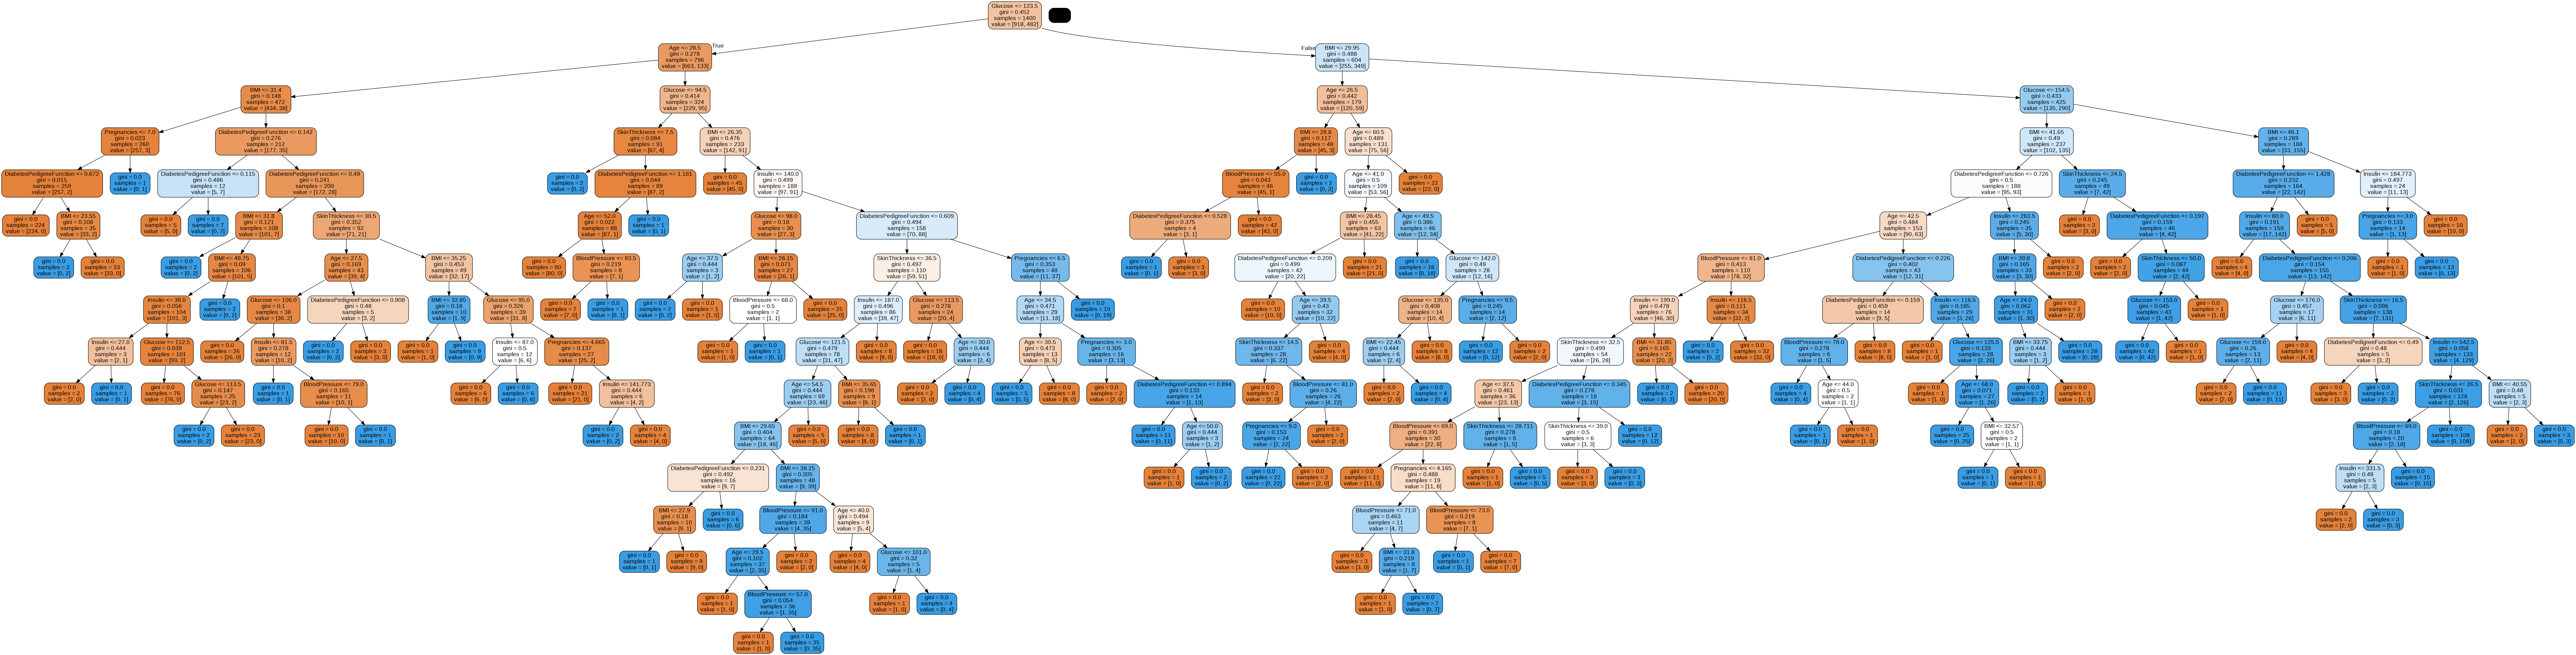

In [46]:
from io import StringIO
dot_data = StringIO()  
export_graphviz(dtc, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  